# Data Wrangling: WeRateDogs
## Table of Contents:
### Introduction
### Gathering Data
### Assessing Data
### Cleaning Data
### Analyzing and Visualizing Data

### Introuduction 
In this project I will use the data wrangling methods learned through the course to gather, assess, and clean three datasets that are revolved about the twitter user 

# Gathering Data

In [1]:
import pandas as ps
import numpy as ny
import matplotlib.pyplot as mlt
%matplotlib inline
import seaborn as sns
import requests 
import json
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer


In [5]:
twitter_archive=ps.read_csv('https://github.com/jinnotjn/WeRateDogs-/blob/main/twitter-archive-enhanced.csv?raw=true')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)


with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

    
image_prediction = ps.read_csv('image-predictions.tsv', sep='\t' )
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [4]:
'''
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict) '''

'\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = twitter_archive.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in th

In [5]:
tweet_json_data= []
with open('tweet-json.txt', 'r') as json_file:
    # read the first line to start the loop
    for line in json_file:
        # print the line
        print(line)
        # break (breaks out of the loop)
        break

{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"media

In [6]:
tweet_json_data= []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        data=json.loads(line)
        tweet_dict={
           'tweet_id': data['id'],
            'retweet_count': data['retweet_count'],
            'favorite_count': data['favorite_count']
        }
        print(tweet_dict)

{'tweet_id': 892420643555336193, 'retweet_count': 8853, 'favorite_count': 39467}
{'tweet_id': 892177421306343426, 'retweet_count': 6514, 'favorite_count': 33819}
{'tweet_id': 891815181378084864, 'retweet_count': 4328, 'favorite_count': 25461}
{'tweet_id': 891689557279858688, 'retweet_count': 8964, 'favorite_count': 42908}
{'tweet_id': 891327558926688256, 'retweet_count': 9774, 'favorite_count': 41048}
{'tweet_id': 891087950875897856, 'retweet_count': 3261, 'favorite_count': 20562}
{'tweet_id': 890971913173991426, 'retweet_count': 2158, 'favorite_count': 12041}
{'tweet_id': 890729181411237888, 'retweet_count': 16716, 'favorite_count': 56848}
{'tweet_id': 890609185150312448, 'retweet_count': 4429, 'favorite_count': 28226}
{'tweet_id': 890240255349198849, 'retweet_count': 7711, 'favorite_count': 32467}
{'tweet_id': 890006608113172480, 'retweet_count': 7624, 'favorite_count': 31166}
{'tweet_id': 889880896479866881, 'retweet_count': 5156, 'favorite_count': 28268}
{'tweet_id': 88966538833368

In [7]:
tweet_json_data= []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        data=json.loads(line)
        tweet_dict={
            'tweet_id': data['id'],
            'retweet_count': data['retweet_count'],
            'favorite_count': data['favorite_count']
        }
        tweet_json_data.append(tweet_dict)
tdf=ps.DataFrame(tweet_json_data)

In [8]:
tdf.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


# Assessing

In [9]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
1501,692142790915014657,6.920419e+17,4.196984e+09,2016-01-27 00:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are some pictures of Teddy that further ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692142790...,13,10,None,None,None,None,None
508,812503143955202048,NaN,NaN,2016-12-24 03:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm happy to inform you all that Jake is in ex...,NaN,NaN,NaN,https://m.facebook.com/story.php?story_fbid=18...,13,10,None,None,None,None,None
1592,686394059078897668,NaN,NaN,2016-01-11 03:47:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pup's having a nightmare that he forgot t...,NaN,NaN,NaN,https://vine.co/v/iMqBebnOvav,12,10,None,None,None,None,None
2291,667165590075940865,NaN,NaN,2015-11-19 02:20:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. AKA Fetty Woof. Lost eye savi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667165590...,10,10,Churlie,None,None,None,None


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [14]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
twitter_archive.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Lola             10
Penny            10
Tucker           10
Bo                9
Winston           9
Sadie             8
the               8
Buddy             7
Toby              7
Daisy             7
an                7
Bailey            7
Bella             6
Leo               6
Rusty             6
Jax               6
Oscar             6
Koda              6
Milo              6
Scout             6
Stanley           6
Jack              6
Dave              6
Louis             5
               ... 
Schnitzel         1
Miguel            1
Craig             1
Pumpkin           1
Tove              1
Margo             1
Charleson         1
Jiminus           1
Arlen             1
Zeek              1
Sprinkles         1
Trevith           1
Newt              1
Snoopy            1
Snoop             1
Jeffrie           1
Stephanus         1
unacceptable      1
Julio             1


### Quality

-Some columns are float instead of integers (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id)<br>
-Some columns are object instead of datetime (timestamp and retweeted_status_timestamp)<br>
-rating_numerator and rating_denominator have invalid values (denominator should always be 10 and numerator should always be greater than 10 yet not that great)<br> -The name column has invalid names('None','a', and 'an') 

### Tidiness
-Dog stages are spread on four columns (doggo, floofer, pupper, puppo)

In [17]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
image_prediction['jpg_url'].value_counts()

https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg                                            2
https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg                                            2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                                            2
https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg                                            2
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                                            2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg                                            2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1

In [21]:
image_prediction['jpg_url'].duplicated().sum()

66

### Quality
-Breed names are not capitalized.<br>- there are 66 pictures(jpg_url) that are duplicated <br>-Breed names are seperated by '_'<br>-Some image predictions are not dog breed.
### Tidiness
-A seperate table for image_prediction is not needed.

In [22]:
tdf

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


In [23]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [24]:
tdf.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


### Tidiness:
a seperate table for tdf is not needed 

# Summary
### Quality:
-Some columns are float instead of integers (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id)<br>
-Some columns are object instead of datetime (timestamp and retweeted_status_timestamp)<br>
-rating_numerator and rating_denominator have invalid values (denominator should always be 10 and numerator should always be greater than 10 yet not that great)<br> -The name column has invalid names('a', 'an') <br>-Breed names are not capitalized<br>- there are 66 pictures(jpg_url) that are duplicated <br>-Breed names are seperated by '_'<br>-Some image predictions are not dog breed. 
### Tidiness:
-Dog stages are spread on four columns (doggo, floofer, pupper, puppo)<br>-Seperate tables for image_prediction and tdf are not needed.

# Cleaning:

In [25]:
# generaing copies of the dataframes to make cleaned versions
clean_ta=twitter_archive.copy()
clean_img_pred=image_prediction.copy()
clean_tdf=tdf.copy()

#### Define
merging the other two tables into twitter archive column

#### Code

In [26]:
#to simplify the work I will merge the clean_tdf and clean_img_pred into the clean_ta table
clean_ta=ps.merge(left=clean_ta, right=clean_img_pred, left_on='tweet_id', right_on='tweet_id', how='inner')
clean_ta=ps.merge(left=clean_ta, right=clean_tdf, left_on='tweet_id', right_on='tweet_id', how='inner')

#### Test

In [27]:
clean_ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

#### Define
move the 4 seperated dog stages columns  into one column dog_stage

#### Code

In [28]:
clean_ta.loc[clean_ta.doggo == 'None', 'doggo'] = ''
clean_ta.loc[clean_ta.floofer == 'None', 'floofer'] = ''
clean_ta.loc[clean_ta.pupper == 'None', 'pupper'] = ''
clean_ta.loc[clean_ta.puppo == 'None', 'puppo'] = ''
clean_ta.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1753
1,,,,puppo,23
2,,,pupper,,210
3,,floofer,,,7
4,doggo,,,,67
5,doggo,,,puppo,1
6,doggo,,pupper,,11
7,doggo,floofer,,,1


In [29]:
clean_ta['dog_stage'] = clean_ta.doggo + clean_ta.floofer + clean_ta.pupper + clean_ta.puppo
clean_ta.loc[clean_ta.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
clean_ta.loc[clean_ta.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
clean_ta.loc[clean_ta.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

clean_ta.loc[clean_ta.dog_stage == '', 'dog_stage'] = 'None'

#### Test

In [30]:
clean_ta.dog_stage.value_counts()

None             1753
pupper            210
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

Obviously there many rows with no identified dog stage

#### Define
Change timestamp and retweeted_timestamp into datetime

#### Code

In [31]:
clean_ta['timestamp'] = ps.to_datetime(clean_ta.timestamp)
clean_ta['retweeted_timestamp'] = ps.to_datetime(clean_ta.timestamp)
clean_ta['retweeted_status_timestamp'] = ps.to_datetime(clean_ta.timestamp)


Test

In [32]:
clean_ta.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
jpg_url                               object
img_num                                int64
p1                                    object
p1_conf                              float64
p1_dog                                  bool
p2        

#### Define
 change (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) into integers

#### Code

In [33]:
clean_ta['tweet_id'] = clean_ta['tweet_id'].astype(str)
clean_ta['in_reply_to_status_id'] = clean_ta['in_reply_to_status_id'].astype(str)
clean_ta['in_reply_to_user_id'] = clean_ta['in_reply_to_user_id'].astype(str)
clean_ta['retweeted_status_id'] = clean_ta['retweeted_status_id'].astype(str)
clean_ta['retweeted_status_user_id'] = clean_ta['retweeted_status_user_id'].astype(str)

#### Test

In [34]:
clean_ta.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
jpg_url                               object
img_num                                int64
p1                                    object
p1_conf                              float64
p1_dog                                  bool
p2        

#### Define
change a and an into None

#### Code

In [35]:
clean_ta['name'] = clean_ta['name'].str.title()


In [36]:
clean_ta.name = clean_ta.name.str.replace('A', 'None')
clean_ta.name = clean_ta.name.str.replace('An', 'None')

#### Test

In [37]:
clean_ta.name.value_counts()

None            632
Charlie          11
Cooper           10
Penny            10
Tucker           10
Oliver           10
Lucy             10
Lola              8
Winston           8
Bo                8
Sadie             8
Toby              7
Daisy             7
Nonen             7
The               7
Koda              6
Bailey            6
Stanley           6
Bella             6
Jax               6
Rusty             6
Milo              6
Dave              6
Scout             6
Oscar             5
Louis             5
Nonelfie          5
Larry             5
Chester           5
Leo               5
               ... 
Dex               1
Rinna             1
Karma             1
Chuck             1
Willem            1
Nonelejandro      1
Trevith           1
Gidget            1
Jeffrie           1
Jamesy            1
Brian             1
Jiminus           1
Keurig            1
Zeek              1
Sprinkles         1
Nonembrose        1
Nonece            1
Snoop             1
Stephanus         1


#### Define
Change the '_' in dog breeds names into a space

#### Code

In [38]:
clean_ta['p1'] = clean_ta['p1'].str.replace('_',' ')
clean_ta['p2'] = clean_ta['p2'].str.replace('_',' ')
clean_ta['p3'] = clean_ta['p3'].str.replace('_',' ')

In [39]:
clean_ta[['p1','p2','p3']].sample(5)

,p1,p2,p3
148,malamute,Siberian husky,Eskimo dog
81,laptop,French bulldog,printer
1404,boxer,bull mastiff,French bulldog
611,collie,borzoi,Border collie
1742,pug,French bulldog,bull mastiff


#### Define
Drop duplicated images 

#### Code

In [40]:
clean_ta['jpg_url'].drop_duplicates(inplace=True)

#### Test

In [41]:
clean_ta['jpg_url'].duplicated().sum()

0

#### Define
remove rows that are not dog breeds

#### Code

In [42]:
clean_ta=clean_ta.query('p1_dog==True')

#### Test

In [43]:
clean_ta.p1.value_counts().sum()

1531

#### Define
Capitalize each dog breed name

#### Code

In [44]:
clean_ta['p1'] = clean_ta['p1'].str.title()
clean_ta['p2'] = clean_ta['p2'].str.title()
clean_ta['p3'] = clean_ta['p3'].str.title()

In [45]:
clean_ta[['p1','p2','p3']].sample(5)

,p1,p2,p3
54,Golden Retriever,Labrador Retriever,Cocker Spaniel
180,Schipperke,Crossword Puzzle,Chihuahua
1531,English Setter,Shih-Tzu,Old English Sheepdog
2033,Border Collie,English Springer,Collie
83,Vizsla,Bloodhound,Chesapeake Bay Retriever


#### Define 
fix denominators that are less than 10<br>
P.S I will sleep on fixing the numerator as suggested by Udacity menotrs

#### Code

In [46]:
clean_ta['rating_denominator'].value_counts()

10     1516
50        3
80        2
150       1
130       1
110       1
90        1
70        1
40        1
20        1
11        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [47]:
#after all the cleaning above the less than 10 denomeinators are down to only 2 and 7
clean_ta['rating_denominator']=clean_ta['rating_denominator'].replace([2, 7], [10,10])

#### Test

In [48]:
clean_ta['rating_denominator'].value_counts()

10     1518
50        3
80        2
150       1
130       1
110       1
90        1
70        1
40        1
20        1
11        1
Name: rating_denominator, dtype: int64

This ends the Wrangling stage, next is the analyzing and visualizing

## Analyzing and Visualizing Data

In [49]:
#Store the cleaned data to a csv file as requested for the project
clean_ta.to_csv('twitter_account_master.csv', index=False, encoding='utf-8')
dogs_df=ps.read_csv('twitter_account_master.csv')

### Insight One
What are the most common dogs based on first prediction 

In [50]:
dogs_df['p1'].value_counts()

Golden Retriever               150
Labrador Retriever             100
Pembroke                        88
Chihuahua                       83
Pug                             57
Chow                            44
Samoyed                         43
Toy Poodle                      39
Pomeranian                      38
Malamute                        30
Cocker Spaniel                  30
French Bulldog                  26
Chesapeake Bay Retriever        23
Miniature Pinscher              23
Staffordshire Bullterrier       20
German Shepherd                 20
Siberian Husky                  20
Cardigan                        19
Maltese Dog                     18
Eskimo Dog                      18
Shetland Sheepdog               18
Beagle                          18
Rottweiler                      17
Lakeland Terrier                17
Shih-Tzu                        17
Kuvasz                          16
Italian Greyhound               16
West Highland White Terrier     14
Great Pyrenees      

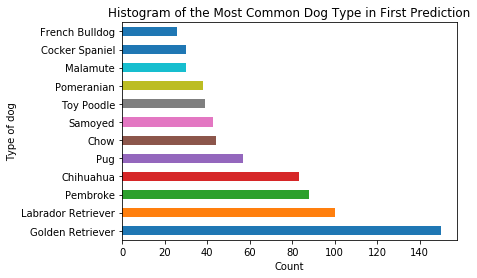

In [51]:
dog_p1_df= dogs_df.groupby('p1').filter(lambda x: len(x)>=25)

dog_p1_df['p1'].value_counts().plot(kind = 'barh')
mlt.title('Histogram of the Most Common Dog Type in First Prediction')
mlt.xlabel('Count')
mlt.ylabel('Type of dog')

graph = mlt.gcf() 
graph.savefig('p1_dogs.png',bbox_inches='tight');


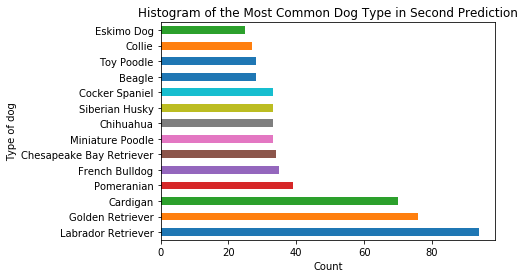

In [52]:
dog_p2_df= dogs_df.groupby('p2').filter(lambda x: len(x)>=25)

dog_p2_df['p2'].value_counts().plot(kind = 'barh')
mlt.title('Histogram of the Most Common Dog Type in Second Prediction')
mlt.xlabel('Count')
mlt.ylabel('Type of dog')

graph = mlt.gcf() 
graph.savefig('p2_dogs.png',bbox_inches='tight');

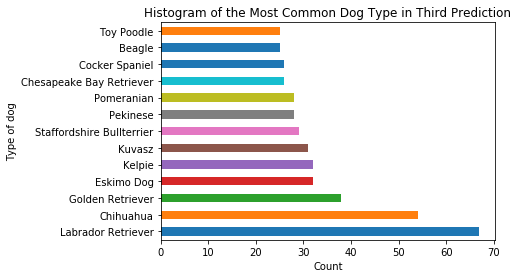

In [53]:
dog_p3_df= dogs_df.groupby('p3').filter(lambda x: len(x)>=25)

dog_p3_df['p3'].value_counts().plot(kind = 'barh')
mlt.title('Histogram of the Most Common Dog Type in Third Prediction')
mlt.xlabel('Count')
mlt.ylabel('Type of dog')

graph = mlt.gcf() 
graph.savefig('p3_dogs.png',bbox_inches='tight');

The 3 most common dogs as a first prediction are Golden Retriever, Labrador Retriever, and Pembroke.<br> But in the second prediction the Labrador switch ranks with the Golden Retriever and the Cardigan ranks third.<br> In the third predictions the Golden comes third and the Chihuahua takes the second place

### Second Insight: The Most Common Dog Stage

In [54]:
dogs_df.dog_stage.value_counts()

None             1294
pupper            148
doggo              51
puppo              19
doggo,pupper       10
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

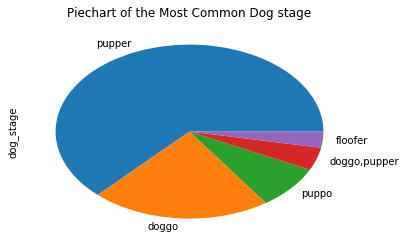

In [55]:
dogstage_df= dogs_df[dogs_df['dog_stage']!='None'].groupby('dog_stage').filter(lambda x: len(x)>1)

dogstage_df['dog_stage'].value_counts().plot(kind = 'pie')
mlt.title('Piechart of the Most Common Dog stage')


graph = mlt.gcf() 
graph.savefig('Dogs_stage.png',bbox_inches='tight');


From this graph we can see that Pupper is the most common followed by doggo and puppo

### Insight Three: Rating Numerator vs Retweets

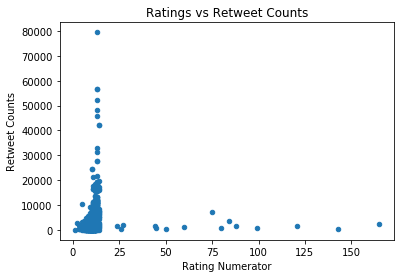

In [56]:
dogs_df.plot(x='rating_numerator',y='retweet_count', kind='scatter')
mlt.xlabel('Rating Numerator')
mlt.ylabel('Retweet Counts')
mlt.title('Ratings vs Retweet Counts')

fig = mlt.gcf()
fig.savefig('NumVsRT.png',bbox_inches='tight');

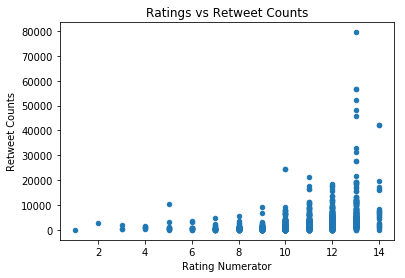

In [58]:
#Plotting without the oultiers
dogs_df_num=dogs_df[dogs_df['rating_numerator']<=[20]]
dogs_df_num.plot(x='rating_numerator',y='retweet_count', kind='scatter')
mlt.xlabel('Rating Numerator')
mlt.ylabel('Retweet Counts')
mlt.title('Ratings vs Retweet Counts')

fig = mlt.gcf()
fig.savefig('NumVsRT.png',bbox_inches='tight');

The tweets that get a high rating do not necessarily get more retweets